# Global CO2 Emissions: Why should you care?🤔

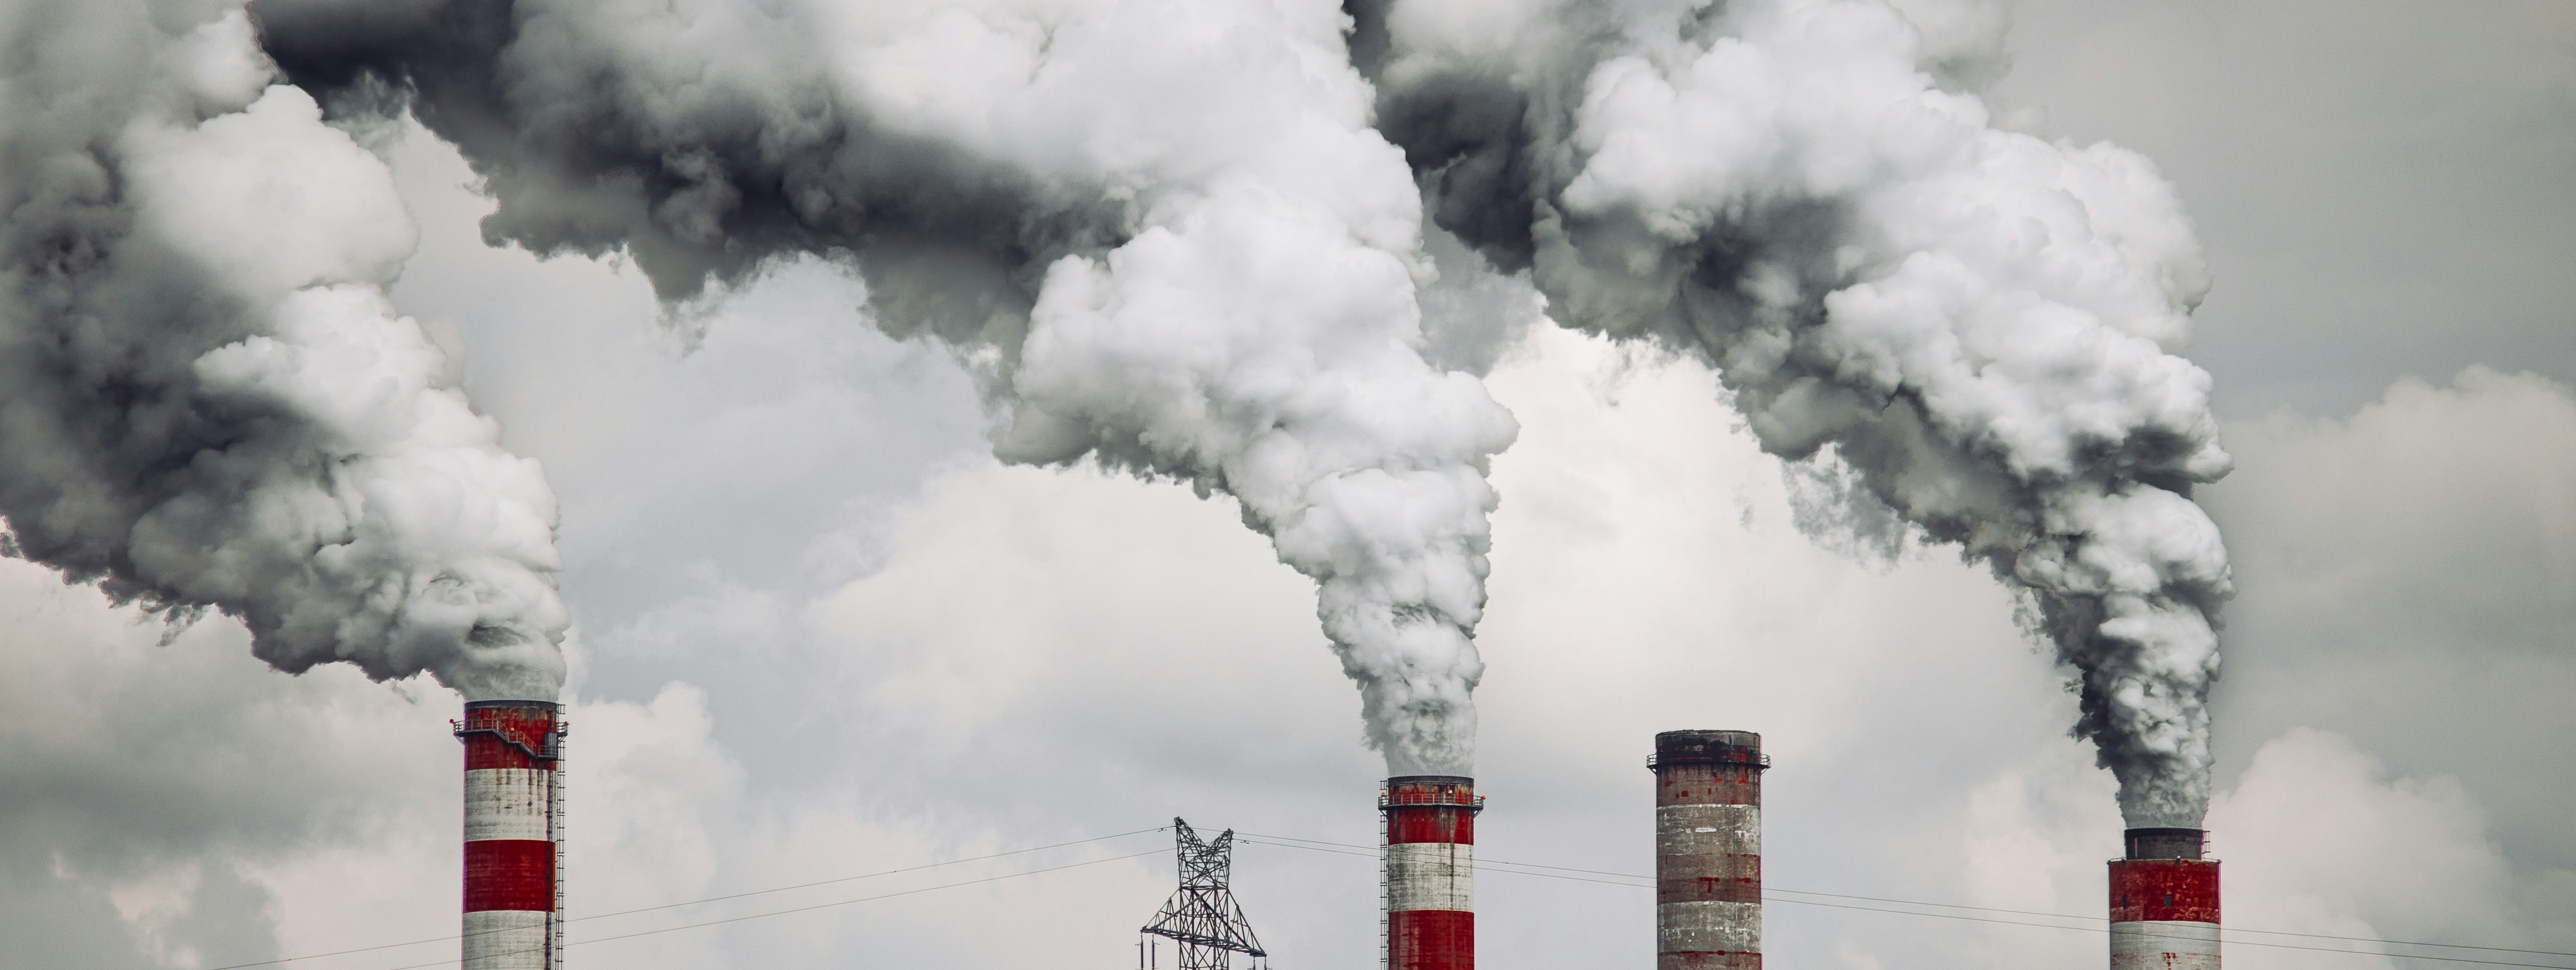

### Carbon dioxide
Carbon dioxide (CO2) is the most abundant greenhouse gas emitted through human activities. It traps heat in the atmosphere, causing global warming and disrupting climate patterns. Understanding CO2 emissions is crucial for analyzing climate change and its potential consequences.

#### Sources
The primary sources of CO2 emissions are: 
- fossil fuel combustion (coal, oil, natural gas) for energy production 
- transportation, and 
- industrial processes. 
- Land-use changes like deforestation also contribute.

#### Trends 
Global CO2 emissions have been steadily increasing since the Industrial Revolution, with a significant acceleration in recent decades.

#### Impacts
Rising CO2 concentrations are linked to a variety of climate change effects, including rising global temperatures, melting glaciers, sea level rise, extreme weather events, and ocean acidification.
This data analysis project will delve deeper into CO2 emission patterns, focusing on countries with the highest emissions. By analyzing this data, we aim to gain insights into the drivers of CO2 emissions and their potential environmental consequences.

In [29]:
#importing the needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm #matplotlib color map
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [30]:
#importing the co2 emissions csv
data = pd.read_csv("global_emissions_1.csv")

In [31]:
#viewing the first few rows of the dataset
data.head(10)

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
0,Afghanistan,AF,93,1750,0.0,41128771.0,652230.0,0.40%,63/km²
1,Afghanistan,AF,93,1751,0.0,41128771.0,652230.0,0.40%,63/km²
2,Afghanistan,AF,93,1752,0.0,41128771.0,652230.0,0.40%,63/km²
3,Afghanistan,AF,93,1753,0.0,41128771.0,652230.0,0.40%,63/km²
4,Afghanistan,AF,93,1754,0.0,41128771.0,652230.0,0.40%,63/km²
5,Afghanistan,AF,93,1755,0.0,41128771.0,652230.0,0.40%,63/km²
6,Afghanistan,AF,93,1756,0.0,41128771.0,652230.0,0.40%,63/km²
7,Afghanistan,AF,93,1757,0.0,41128771.0,652230.0,0.40%,63/km²
8,Afghanistan,AF,93,1758,0.0,41128771.0,652230.0,0.40%,63/km²
9,Afghanistan,AF,93,1759,0.0,41128771.0,652230.0,0.40%,63/km²


In [32]:
#viewing the last few rows of the dataset
data.tail(10)

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
59610,Zimbabwe,ZW,263,2011,681878824.0,16320537.0,390757.0,0.30%,42/km²
59611,Zimbabwe,ZW,263,2012,689761713.0,16320537.0,390757.0,0.30%,42/km²
59612,Zimbabwe,ZW,263,2013,701597967.0,16320537.0,390757.0,0.30%,42/km²
59613,Zimbabwe,ZW,263,2014,713503654.0,16320537.0,390757.0,0.30%,42/km²
59614,Zimbabwe,ZW,263,2015,725729475.0,16320537.0,390757.0,0.30%,42/km²
59615,Zimbabwe,ZW,263,2016,736467042.0,16320537.0,390757.0,0.30%,42/km²
59616,Zimbabwe,ZW,263,2017,746048675.0,16320537.0,390757.0,0.30%,42/km²
59617,Zimbabwe,ZW,263,2018,757903042.0,16320537.0,390757.0,0.30%,42/km²
59618,Zimbabwe,ZW,263,2019,768852126.0,16320537.0,390757.0,0.30%,42/km²
59619,Zimbabwe,ZW,263,2020,779383468.0,16320537.0,390757.0,0.30%,42/km²


In [33]:
#creating a copy of the dataframe
df = data.copy()

In [34]:
#checking the shape of the dataset
df.shape

(59620, 9)

In [35]:
#checking the info on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59620 entries, 0 to 59619
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              59620 non-null  object 
 1   Code                 57452 non-null  object 
 2   Calling Code         56097 non-null  object 
 3   Year                 59620 non-null  int64  
 4   CO2 emission (Tons)  59620 non-null  float64
 5   Population(2022)     59349 non-null  float64
 6   Area                 59349 non-null  float64
 7   % of World           59349 non-null  object 
 8   Density(km2)         59349 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 4.1+ MB


### Data cleaning steps:
- Check for and remove duplicates
- Drop unnecessary columns
- Check and remove null values
- Adjust CO2 emission values to millions
- Rename columns correctly
- Strip % of World and Density columns 
- Change data types of % of World and Density columns to floats  


In [36]:
#checking and removing duplicates
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
59615    False
59616    False
59617    False
59618    False
59619    False
Length: 59620, dtype: bool

In [37]:
df.duplicated().sum()

0

In [38]:
#dropping unnecessary columns
df.drop(columns=["Code","Calling Code"],inplace=True)

In [39]:
df.head()

,Country,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
0,Afghanistan,1750,0.0,41128771.0,652230.0,0.40%,63/km²
1,Afghanistan,1751,0.0,41128771.0,652230.0,0.40%,63/km²
2,Afghanistan,1752,0.0,41128771.0,652230.0,0.40%,63/km²
3,Afghanistan,1753,0.0,41128771.0,652230.0,0.40%,63/km²
4,Afghanistan,1754,0.0,41128771.0,652230.0,0.40%,63/km²


In [40]:
#checking for and removing null values
df.isna().sum()


Country                  0
Year                     0
CO2 emission (Tons)      0
Population(2022)       271
Area                   271
% of World             271
Density(km2)           271
dtype: int64

In [41]:
#dropping null values
df.dropna(inplace=True)

In [42]:
#checking if nulls are dropped
df.isna().sum()

Country                0
Year                   0
CO2 emission (Tons)    0
Population(2022)       0
Area                   0
% of World             0
Density(km2)           0
dtype: int64

In [43]:
#converting CO2 emissions column into millions for readability
df["CO2 Emission(million_tons)"] = round((df["CO2 emission (Tons)"]/1000000),2)

In [44]:
#deletng CO2 emissions column
del df["CO2 emission (Tons)"]

In [45]:
#rearranging columns
columns = list(df.columns)
columns.remove("CO2 Emission(million_tons)")
year_index = columns.index("Year")
columns.insert(year_index+1,"CO2 Emission(million_tons)")
df = df[columns]

In [46]:
df.head(100)

,Country,Year,CO2 Emission(million_tons),Population(2022),Area,% of World,Density(km2)
0,Afghanistan,1750,0.0,41128771.0,652230.0,0.40%,63/km²
1,Afghanistan,1751,0.0,41128771.0,652230.0,0.40%,63/km²
2,Afghanistan,1752,0.0,41128771.0,652230.0,0.40%,63/km²
3,Afghanistan,1753,0.0,41128771.0,652230.0,0.40%,63/km²
4,Afghanistan,1754,0.0,41128771.0,652230.0,0.40%,63/km²
...,...,...,...,...,...,...,...
95,Afghanistan,1845,0.0,41128771.0,652230.0,0.40%,63/km²
96,Afghanistan,1846,0.0,41128771.0,652230.0,0.40%,63/km²
97,Afghanistan,1847,0.0,41128771.0,652230.0,0.40%,63/km²
98,Afghanistan,1848,0.0,41128771.0,652230.0,0.40%,63/km²


In [47]:
#renaming columns
df.rename({"Area":"Land_Area"}, axis=1, inplace=True)
df.rename({"% of World":"%_of_World_Land_Area"}, axis=1, inplace=True)
df.rename({"Density(km2)":"Population_Density(km2)"}, axis=1, inplace=True)


In [48]:
df.head()

,Country,Year,CO2 Emission(million_tons),Population(2022),Land_Area,%_of_World_Land_Area,Population_Density(km2)
0,Afghanistan,1750,0.0,41128771.0,652230.0,0.40%,63/km²
1,Afghanistan,1751,0.0,41128771.0,652230.0,0.40%,63/km²
2,Afghanistan,1752,0.0,41128771.0,652230.0,0.40%,63/km²
3,Afghanistan,1753,0.0,41128771.0,652230.0,0.40%,63/km²
4,Afghanistan,1754,0.0,41128771.0,652230.0,0.40%,63/km²


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59349 entries, 0 to 59619
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     59349 non-null  object 
 1   Year                        59349 non-null  int64  
 2   CO2 Emission(million_tons)  59349 non-null  float64
 3   Population(2022)            59349 non-null  float64
 4   Land_Area                   59349 non-null  float64
 5   %_of_World_Land_Area        59349 non-null  object 
 6   Population_Density(km2)     59349 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 3.6+ MB


In [50]:
#stripping and converting %_of_World_Land_Area column to float
df["%_of_World_Land_Area"] = df["%_of_World_Land_Area"].str.strip("%").astype(float)



In [51]:
#stripping and converting Population_Density(km2) column to float
df['Population_Density(km2)'] = df['Population_Density(km2)'].str[:-4].str.replace(',','',regex=True).astype(float)


In [52]:
df.head()

,Country,Year,CO2 Emission(million_tons),Population(2022),Land_Area,%_of_World_Land_Area,Population_Density(km2)
0,Afghanistan,1750,0.0,41128771.0,652230.0,0.4,63.0
1,Afghanistan,1751,0.0,41128771.0,652230.0,0.4,63.0
2,Afghanistan,1752,0.0,41128771.0,652230.0,0.4,63.0
3,Afghanistan,1753,0.0,41128771.0,652230.0,0.4,63.0
4,Afghanistan,1754,0.0,41128771.0,652230.0,0.4,63.0


In [55]:
df["Population_Density(km2)"] = df["Population_Density(km2)"].astype("float")

In [56]:
df.head(10)

,Country,Year,CO2 Emission(million_tons),Population(2022),Land_Area,%_of_World_Land_Area,Population_Density(km2)
0,Afghanistan,1750,0.0,41128771.0,652230.0,0.4,63.0
1,Afghanistan,1751,0.0,41128771.0,652230.0,0.4,63.0
2,Afghanistan,1752,0.0,41128771.0,652230.0,0.4,63.0
3,Afghanistan,1753,0.0,41128771.0,652230.0,0.4,63.0
4,Afghanistan,1754,0.0,41128771.0,652230.0,0.4,63.0
5,Afghanistan,1755,0.0,41128771.0,652230.0,0.4,63.0
6,Afghanistan,1756,0.0,41128771.0,652230.0,0.4,63.0
7,Afghanistan,1757,0.0,41128771.0,652230.0,0.4,63.0
8,Afghanistan,1758,0.0,41128771.0,652230.0,0.4,63.0
9,Afghanistan,1759,0.0,41128771.0,652230.0,0.4,63.0


### Exploratory Analysis and Visualizations:
- Create emissions per capita column
- Global CO2 Emissions trend
- Emissions trend by top 5 countries
- Top 10 countries with highest emissions per capita 
- Ghana's emission trend and emission per capita
- Global distribution of emissions per capita

In [57]:
#creating an emissions per capita column
df["Emissions_Per_Capita"] = round((df["CO2 Emission(million_tons)"]*1000000)/df["Population(2022)"],2)
df.head()

,Country,Year,CO2 Emission(million_tons),Population(2022),Land_Area,%_of_World_Land_Area,Population_Density(km2),Emissions_Per_Capita
0,Afghanistan,1750,0.0,41128771.0,652230.0,0.4,63.0,0.0
1,Afghanistan,1751,0.0,41128771.0,652230.0,0.4,63.0,0.0
2,Afghanistan,1752,0.0,41128771.0,652230.0,0.4,63.0,0.0
3,Afghanistan,1753,0.0,41128771.0,652230.0,0.4,63.0,0.0
4,Afghanistan,1754,0.0,41128771.0,652230.0,0.4,63.0,0.0


#### Global CO2 emissions trend from 1750 to 2020

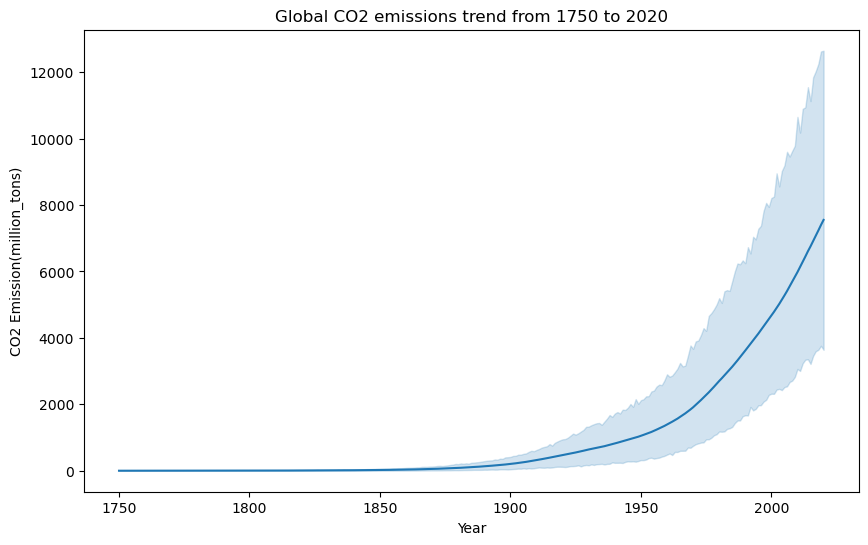

In [58]:
#plotting a Global CO2 Emissions trend chart
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="Year", y="CO2 Emission(million_tons)")
plt.title("Global CO2 emissions trend from 1750 to 2020")
plt.show()

#### Cummulative emissions trends of the top 5 countries

In [ ]:
#saving the top 5 countries with highest emmissions in a variable
top_5_countries = df.groupby("Country")["CO2 Emission(million_tons)"].sum().sort_values(ascending=False).head(5).to_frame()
df_top5=df[(df['Country']=='United States')|(df['Country']=='China')|(df['Country']=='Russia')|
           (df['Country']=='Germany')|(df['Country']=='United Kingdom')]

In [ ]:
#plotting the emissions trend for the top 5 countries
plt.figure(figsize=(10,6))
ax=sns.relplot(x="Year", y="CO2 Emission(million_tons)", 
            data=df_top5, kind="line", 
            hue="Country", style="Country",
            markers=False, dashes=False,height=5, aspect=2)
plt.title("Cummulative emissions trends of the top 5 countries")
plt.show()

#### Cummulative CO2 emissions per capita of the top 10 Countries

In [ ]:
#saving the top 10 countries with the highest emissions per capita in a variable
top_10_per_capita_emissions = df.groupby("Country")["Emissions_Per_Capita"].sum().sort_values(ascending=False).head(10).to_frame()
top_10_per_capita_emissions

In [ ]:
#plotting the top 10 countries with the highest emissions per capita chart
plt.figure(figsize = (19,7))
ax = sns.barplot(
    x=top_10_per_capita_emissions.index, 
    y=top_10_per_capita_emissions["Emissions_Per_Capita"], 
    data=top_10_per_capita_emissions
)
plt.title("Cummulative CO2 emissions per capita of the top 10 Countries")

ax.bar_label(ax.containers[0], fontsize=10)

ax.set_yticklabels([])

plt.show()

#### Ghana's CO2 emission trend from 1750 to 2020

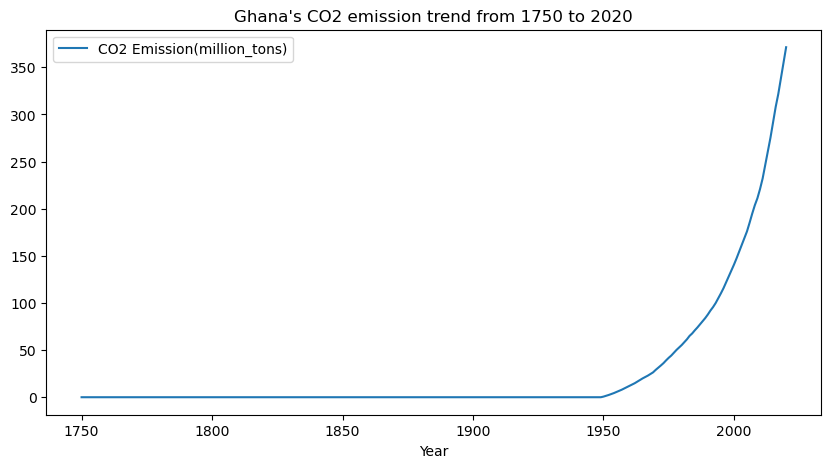

In [59]:
#plotting Ghana's emission trend over the years
df[df['Country']=='Ghana'].plot(x='Year',y='CO2 Emission(million_tons)',figsize=(10,5));
plt.title("Ghana's CO2 emission trend from 1750 to 2020")
plt.show()

#### Ghana's per capita CO2 emissions from 2011 to 2020

In [60]:
#saving Ghana's per capita emissions for 2011 to 2020 in variable
ghana = df[df["Country"]=="Ghana"].sort_values(by="Year", ascending=False).head(10)
ghana

,Country,Year,CO2 Emission(million_tons),Population(2022),Land_Area,%_of_World_Land_Area,Population_Density(km2),Emissions_Per_Capita
20595,Ghana,2020,371.32,33475870.0,238533.0,0.2,140.0,11.09
20594,Ghana,2019,355.32,33475870.0,238533.0,0.2,140.0,10.61
20593,Ghana,2018,338.40,33475870.0,238533.0,0.2,140.0,10.11
20592,Ghana,2017,321.72,33475870.0,238533.0,0.2,140.0,9.61
20591,Ghana,2016,307.98,33475870.0,238533.0,0.2,140.0,9.20
20590,Ghana,2015,291.43,33475870.0,238533.0,0.2,140.0,8.71
20589,Ghana,2014,275.32,33475870.0,238533.0,0.2,140.0,8.22
20588,Ghana,2013,260.56,33475870.0,238533.0,0.2,140.0,7.78
20587,Ghana,2012,246.38,33475870.0,238533.0,0.2,140.0,7.36
20586,Ghana,2011,232.07,33475870.0,238533.0,0.2,140.0,6.93


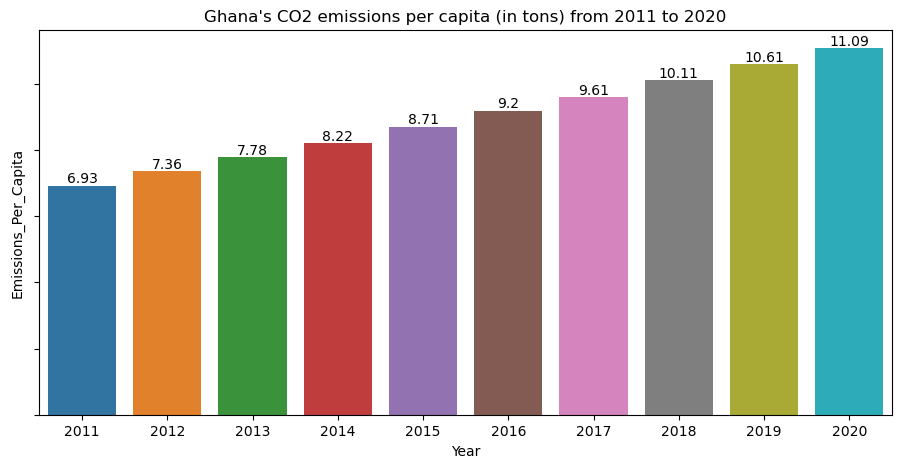

In [61]:
#plotting Ghana's per capita emission for the last decade
plt.figure(figsize=(11,5))
ax = sns.barplot(ghana, x="Year", y="Emissions_Per_Capita", errorbar=None)

ax.bar_label(ax.containers[0], fontsize=10);

plt.title("Ghana's CO2 emissions per capita (in tons) from 2011 to 2020")

ax.set_yticklabels([])

plt.show()

#### Global distribution of emissions per capita

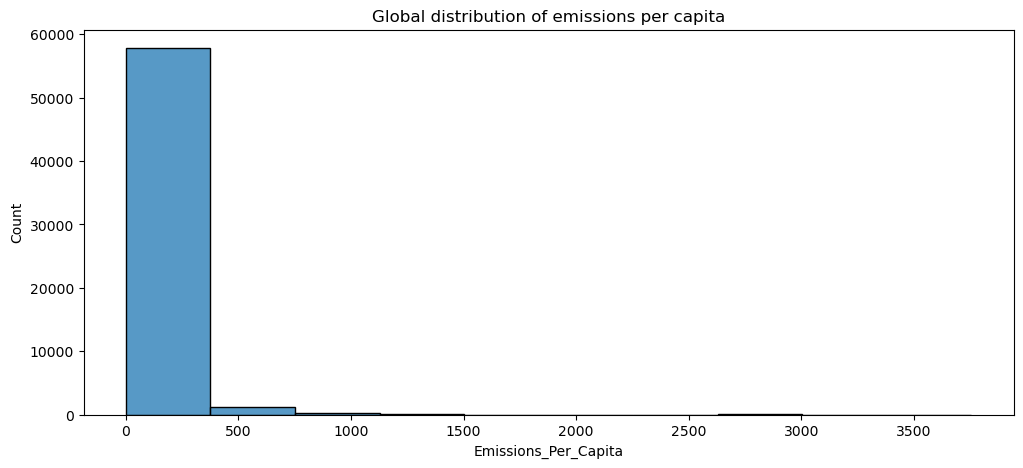

In [62]:
#plotting the global distribution of emissions per capita
plt.figure(figsize = (12,5))
sns.histplot(df["Emissions_Per_Capita"], bins=10)
plt.title("Global distribution of emissions per capita")
plt.show()

### Recommendations

- ##### Transition to Renewable Energy:  
Governments can invest in solar, wind, and hydropower to reduce reliance on fossil fuels.
Promote research and development of advanced energy storage technologies.

- ##### Afforestation and Reforestation:  
Plant more trees to absorb CO2 from the atmosphere.
Protect existing forests to prevent deforestation.  

- ##### Carbon Capture and Storage (CCS):  
Develop and deploy CCS technologies to capture CO2 emissions from industrial processes and power plants.  

#### Ghana-Specific Recommendations:

- ##### Climate-Resilient Agriculture:
Implement climate-smart agricultural practices.
Enhance soil health and water management.

- ##### Resilient Infrastructure:
Improve urban development and resilient mobility infrastructure.
Enhance waste management systems.

- ##### Forest Management:
Focus on reversing deforestation as trees absorb considerable amounts of CO2
